# Data Stuff


In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import xnat
import pandas as pd
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from monai.transforms import NormalizeIntensity

c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## windowing for 3D Data and normalization

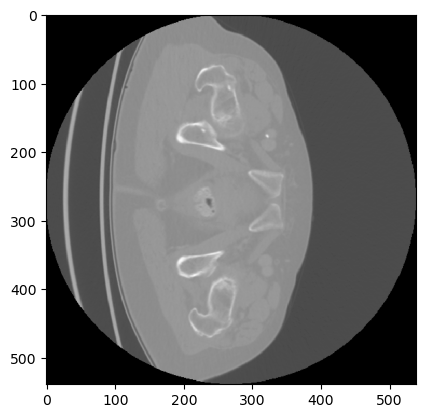

In [32]:
image = nib.load("../../Data/CT_Phase/CILM_CT_107851_0000.nii.gz")
plt.imshow(image.get_fdata()[:,:,40], cmap="gray")

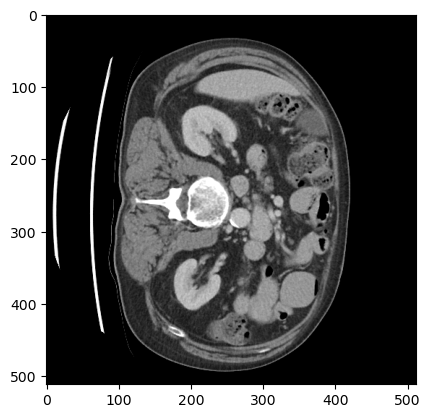

In [46]:
def apply_window_to_volume(batched_volumes, window_center, window_width):
    """
    Apply windowing to a batch of 3D volumes.
    :param batched_volumes: The input batch of 3D volumes.
    :param window_center: The center of the window (window level).
    :param window_width: The width of the window.
    :return: Windowed batch of 3D volumes.
    """
    lower_bound = window_center - window_width / 2
    upper_bound = window_center + window_width / 2
    windowed_batched_volumes = np.clip(batched_volumes, lower_bound, upper_bound)
    return windowed_batched_volumes

trans = NormalizeIntensity()
image = nib.load('../../Data/CT_Phase/Full_image_Liver_slice/CILM_CT_101040_0000.nii.gz').get_fdata()

windowed_image = apply_window_to_volume(image, 50, 400)

plt.imshow(windowed_image[:,:,40], cmap='gray')

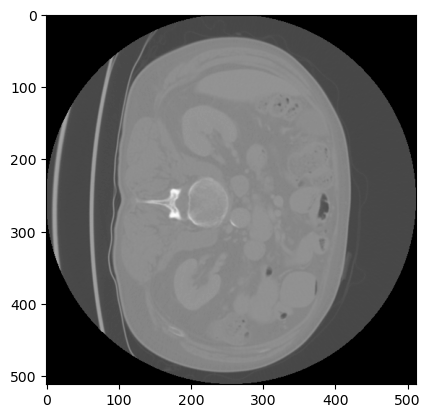

In [45]:
plt.imshow(data[:,:,40], cmap='gray')

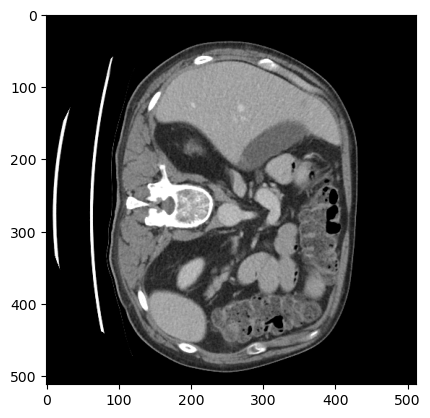

In [33]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def apply_window(slice, level, width):
    lower = level - (width / 2)
    upper = level + (width / 2)
    return np.clip(slice, lower, upper)

# 加载 NIfTI 文件
nifti_img = nib.load('../../Data/CT_Phase/Full_image_Liver_slice/CILM_CT_101040_0000.nii.gz')
data = nifti_img.get_fdata()

# 窗位和窗宽
level = 50
width = 400

# 处理每个切片
windowed_data = np.zeros_like(data)
for i in range(data.shape[-1]):
    windowed_data[:,:,i] = apply_window(data[:,:,i] , level, width)

# 展示处理后的某个切片
plt.imshow(windowed_data[:, :, 50], cmap='gray')
plt.show()


In [57]:
image_lst = os.listdir('../../Data/CT_Phase/Full_Image_Liver_slice_07075/')
image_lst.sort()
save_path = '../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/'
os.mkdir(save_path)
for img in image_lst:
    img_nib= nib.load('../../Data/CT_Phase/Full_image_Liver_slice/'+img)
    img_data = img_nib.get_fdata()
    windowed_image = apply_window_to_volume(img_data, 50, 400)
    image = nib.Nifti1Image(windowed_image, img_nib.affine, img_nib.header)
    nib.save(image,  save_path + img )

    #save data
    



In [56]:
len(os.listdir('../../Data/CT_Phase/Full_image_Liver_slice_07075/'))

263

## test windowing data


'101040'

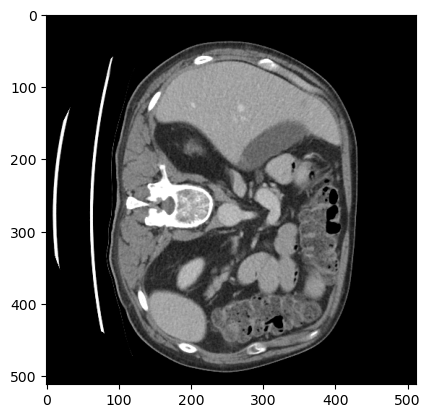

In [55]:
window_image = nib.load('../../Data/CT_Phase/Full_image_Liver_slice_windowed/CILM_CT_101040_0000.nii.gz').get_fdata()
plt.imshow(window_image[:,:,50], cmap='gray')
name = "CILM_CT_101040_0000.nii.gz"

name[8:14]

In [67]:
image = nib.load('../../Data/CT_Phase/Full_image_Liver_slice_07075/CILM_CT_176842_0000.nii.gz').get_fdata()
image.shape

(539, 539, 97)

In [7]:
window_image_2 = nib.load('../../Data/CT_Phase/Full_image_Liver_slice_07075_window/CILM_CT_102030_0000.nii.gz').get_fdata()



-150.0

In [49]:
windowed_image.shape

(193, 193, 280)

In [45]:
windowed_image.shape

(10, 128, 128, 60)

In [28]:

upload_path_lst = [os.path.join('../../Test_Data/Seg_Data/',file) for file in os.listdir('../../Test_Data/Seg_Data/')]
upload_data = pd.read_csv('../Dataset/Datafiles/samuel_scans_used.csv')
upload_data = upload_data.sort_values(by=['Experiment'])
for i in range(upload_data.shape[0]):
        subject = upload_data.loc[i,'Subject']
        experiment = upload_data.loc[i,'Experiment']
        scan = upload_data.loc[i,'Scan']

        #subject_name,experiment_name,scan_name = subject.label,experiment.label,scan.id
        print(f"this is experiment:{experiment}, scan:{scan}")

this is experiment:CT_10033, scan:4
this is experiment:CT_10043, scan:2
this is experiment:CT_10104, scan:2
this is experiment:CT_10203, scan:7
this is experiment:CT_10702, scan:2
this is experiment:CT_10785, scan:2
this is experiment:CT_10871, scan:3
this is experiment:CT_10929, scan:6
this is experiment:CT_10930, scan:2
this is experiment:CT_10954, scan:6
this is experiment:CT_10963, scan:5
this is experiment:CT_11111, scan:4
this is experiment:CT_11136, scan:797
this is experiment:CT_11155, scan:4
this is experiment:CT_11447, scan:5
this is experiment:CT_11655, scan:2
this is experiment:CT_11656, scan:4
this is experiment:CT_11784, scan:3
this is experiment:CT_11909, scan:7
this is experiment:CT_11976, scan:2
this is experiment:CT_12017, scan:2
this is experiment:CT_12190, scan:3
this is experiment:CT_12276, scan:9
this is experiment:CT_12575, scan:2
this is experiment:CT_12724, scan:2
this is experiment:CT_12906, scan:3
this is experiment:CT_12927, scan:3
this is experiment:CT_1295

将CT label正确分类！

In [32]:
phase_label = pd.read_csv('../../Test_Data/CT_Phase/True_Label/Phase_label_all.csv')
phase_label.sort_values(by=['Experiment']).reset_index(inplace=True,drop=True)
phase_label.to_csv('../../Test_Data/CT_Phase/True_Label/Phase_label_all.csv',index=False)

In [33]:
pd.read_csv('../../Test_Data/CT_Phase/True_Label/Phase_label_all.csv')

,Unnamed: 0.1,Unnamed: 0,Subject,Experiment,Insert_Date,Scan,Series_description,Modality,Manufacturer,Headtype,...,seriesdate,acquisition_type,gender,age,birthdate,patient_ID,scanning_sequence,model_name,patient_position,Phase
0,33,343,CRLM_042,CT_10104,2023/3/16,2,A10 abdomen veneus 5.0 weke delen axial,CT,TOSHIBA,CT,...,20170614.0,NaN,M,061Y,NaN,CT_10104,NaN,Aquilion ONE,FFS,2
1,173,1043,CRLM_139,CT_10203,2023/3/16,2,Abd blanco 5.0 B31f,CT,SIEMENS,CT,...,20060130.0,NaN,M,061Y,NaN,CT_10203,NaN,Sensation 16,HFS,0
2,174,1128,CRLM_148,CT_10455,2023/3/22,2,blanco 5.0 mm,CT,PHILIPS,CT,...,NaN,NaN,F,067Y,NaN,CT_10455,NaN,Brilliance 64,FFS,0
3,175,1130,CRLM_148,CT_10455,2023/3/22,6,art. 3.0 mm,CT,PHILIPS,CT,...,NaN,NaN,F,067Y,NaN,CT_10455,NaN,Brilliance 64,FFS,1
4,176,1131,CRLM_148,CT_10455,2023/3/22,7,port. 5.0 mm,CT,PHILIPS,CT,...,NaN,NaN,F,067Y,NaN,CT_10455,NaN,Brilliance 64,FFS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,146,933,CRLM_120,CT_95769,2023/3/22,2-CT1,Abd natief 4.0 B30f,CT,SIEMENS,CT,...,20080610.0,NaN,M,NaN,NaN,CT_95769,NaN,Volume Zoom,FFS,0
276,365,2462,CRLM_322,CT_99089,2023/3/16,6,Lever blanco 2.0 B31f,CT,SIEMENS,CT,...,20100521.0,NaN,M,063Y,NaN,CT_99089,NaN,Sensation 10,FFS,0
277,329,2244,CRLM_290,CT_99400,2023/3/16,5,4F lever blanco 3.0 B31f,CT,SIEMENS,CT,...,20130301.0,NaN,M,073Y,NaN,CT_99400,NaN,Sensation 64,HFS,0
278,330,2245,CRLM_290,CT_99400,2023/3/16,6,4F lever art. 3.0 B31f,CT,SIEMENS,CT,...,20130301.0,NaN,M,073Y,NaN,CT_99400,NaN,Sensation 64,HFS,1


In [27]:
upload_data.reset_index(inplace=True,drop=True)
upload_data.to_csv('../Dataset/Datafiles/samuel_scans_used.csv',index=False)

#check seg data
seg_data = pd.read_csv('../../Test_Data/CT_Phase/Resampled_Phase_Data/Only_0

测试下metrics


In [160]:
from monai.metrics import get_confusion_matrix,compute_roc_auc
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score
from torch import tensor
from sklearn.metrics import precision_score, recall_score
import torch
import numpy as np

class Metrics():
    def __init__(self,num_class=2,y_pred=None,y_true_label=None,targets=None):
        """
        args:
            y_pred: list of predicted tensor
            y_true_label: list of true labels
            targets: dicts of targets and their labels
        """
        self.num_class = num_class
        self.four_rate_dic = {str(i):{'tp':0,'fp':0,'tn':0,'fn':0} for i in range(num_class)}
        self.y_true_label = np.array(y_true_label)
        self.y_pred_label = [torch.argmax(y_pre,dim=1).detach().cpu().numpy().tolist() for y_pre in y_pred]
        self.y_pred_label = [item for sublist in self.y_pred_label for item in sublist]

        self.y_pred_label = np.array(self.y_pred_label)
        self.y_pred_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_pred_label,dtype=torch.int64),num_classes=self.num_class)
        self.y_true_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_true_label.tolist(),dtype=torch.int64),num_classes=self.num_class)
    
    def calculate_metrics(self):
        self.metrics = {str(i): {'f1': 0, 'auc': 0, 'accuracy': 0, 'precision': 0, 'recall': 0} for i in range(self.num_class)}

        for i in range(self.num_class):
            true_binary = (self.y_true_label == i).astype(int)
            pred_binary = (self.y_pred_label == i).astype(int)

            self.metrics[str(i)]['f1'] = f1_score(true_binary, pred_binary)
            self.metrics[str(i)]['precision'] = precision_score(true_binary, pred_binary)
            self.metrics[str(i)]['recall'] = recall_score(true_binary, pred_binary)

            if len(np.unique(true_binary)) > 1:
                self.metrics[str(i)]['auc'] = roc_auc_score(true_binary, self.y_pred_one_hot[:, i])

            self.metrics[str(i)]['accuracy'] = accuracy_score(true_binary, pred_binary)

        return self.metrics



    def get_roc(self,average='macro'):
        return compute_roc_auc(self.y_pred_one_hot,self.y_true_one_hot,average)
        

    def get_four_rate(self) -> tensor:
        """
        args:
            y_pred: (B,C) one-hot tensor
            y_true: (B,C) one-hot tensor
        """
        confu_matrix = get_confusion_matrix(self.y_pred_one_hot,self.y_true_one_hot)
        #calculate tp,fp,tn,fn
        for i in range(self.num_class):
            self.four_rate_dic[str(i)]['tp'] += confu_matrix[:,i,0].sum()
            self.four_rate_dic[str(i)]['fp'] += confu_matrix[:,i,1].sum() 
            self.four_rate_dic[str(i)]['tn'] += confu_matrix[:,i,2].sum() 
            self.four_rate_dic[str(i)]['fn'] += confu_matrix[:,i,3].sum()
        return self.four_rate_dic
    
    def get_accuracy(self) -> float:
        """
        args:
            y_pred_label: list of predicted labels
            y_true_label: list of true labels
        """
        accuracy = accuracy_score(self.y_pred_label,self.y_true_label)
        return accuracy
    
    def get_f1_score(self,average='macro') -> float:
        return f1_score(self.y_pred_label,self.y_true_label,average=average)
    

    def generate_metrics_df(self,epoch):

    # 将指标数据整理成列表形式
        metrics_data = []
        for class_id, class_metrics in self.metrics.items():
            data_row = {"epoch": epoch}  # 首先添加 epoch
            data_row.update({"class_id": class_id})  # 然后添加 class_id
            data_row.update(class_metrics)  # 最后添加其他指标
            metrics_data.append(data_row)
        # 创建DataFrame
        df = pd.DataFrame(metrics_data)

        return df



In [161]:
import numpy as np
# 模拟一些数据
num_classes = 3
y_true = np.array([0,2,1,1,0,2,0]).tolist()
y_pred = [torch.tensor([[0.6, 0.2, 0.2],[0.2, 0.1, 0.7],[0.3, 0.2, 0.5],[0.1, 0.2, 0.7],[0.6, 0.2, 0.2],[0.2, 0.1, 0.7],[0.3, 0.2, 0.5]])]
metrics = Metrics(num_class=num_classes, y_pred=y_pred, y_true_label=y_true)
metrics.calculate_metrics()

import pandas as pd
metrics.generate_metrics_df(3)


c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,epoch,class_id,f1,auc,accuracy,precision,recall
0,3,0,0.800000,0.833333,0.857143,1.0,0.666667
1,3,1,0.000000,0.500000,0.714286,0.0,0.000000
2,3,2,0.571429,0.700000,0.571429,0.4,1.000000


In [102]:
metrics.true_binary

[1, 0]

In [ ]:

# 使用Metrics类
metrics = Metrics(num_class=num_classes, y_pred=y_pred, y_true_label=y_true)
metrics_results = metrics.calculate_metrics()

# 打印结果
for class_id, class_metrics in metrics_results.items():
    print(f"Metrics for class {class_id}:")
    for metric_name, metric_value in class_metrics.items():
        print(f"  {metric_name}: {metric_value:.2f}")


In [43]:
y_pred = [torch.tensor([[0.6, 0.2, 0.2]]), torch.tensor([[0.1, 0.7, 0.2]])]
y_pred = torch.Tensor(np.stack(y_pred))
y_pred_label = [torch.argmax(y_pre,dim=1).detach().cpu().numpy().tolist() for y_pre in y_pred]
y_pred_label = [item for sublist in y_pred_label for item in sublist]


In [45]:
y_true == 0

False

# Data Subset

In [43]:
import numpy as np
np.random.randint(0,100,1).item()

66

In [84]:
import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import sys
sys.path.append('../')
from Core.Dataset.Dataloader import *
from torch.utils.data import Subset
from Core.Utils.Utility import Balanced_sampler






data_path = '../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/'
label_path = '../../Data/CT_Phase/True_Label/Phase_Liver_Label.csv'
Data = DataFiles(data_path,label_path,'Phase')
images_lst = sorted(Data.get_images())
labels_lst = Data.get_labels()
#model =  Swin_Transformer_Classification.SwinUNETR(in_channels=1, out_channels=2, img_size=(256, 256, 128))
tr_dataset = Image_Dataset(image_files=images_lst,labels=labels_lst,transform_methods=None,data_aug=True,label_name=None)
tr_dataloader = Data_Loader(dataset=tr_dataset,batch_size=1,num_workers=0).build_train_loader() 

#val_dataset = Image_Dataset(image_files=vali_images,labels=vali_labels,transform_methods=[EnsureChannelFirst(),Resize((256,256,128)),ToTensor()],data_aug=True,label_name=None)
#val_dataloader = Data_Loader(dataset=val_dataset,batch_size=1,num_workers=0).build_vali_loader() 

In [147]:
[tr_dataset.labels[i] for i in range(len(Sub_tr))],Sub_label

([2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2],
 [2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2])

In [140]:
Sub_tr = Subset(tr_dataset,range(20))
Sub_label = [Sub_tr[i][1] for i in range(20)]
sampler = Balanced_sampler(Sub_label,3)
#Sub_tr[20][1]
Sub_loader = Data_Loader(dataset=Sub_tr,batch_size=1,num_workers=0,sampler=sampler).build_train_loader()




this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_101040_0000.nii.gz 2
this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_102030_0000.nii.gz 0
this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_104550_0000.nii.gz 0
this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_104551_0000.nii.gz 1
this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_104552_0000.nii.gz 2
this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_107850_0000.nii.gz 2
this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_107851_0000.nii.gz 2
this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_111110_0000.nii.gz 0
this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_111111_0000.n

KeyboardInterrupt: 

metatensor(1.0179)

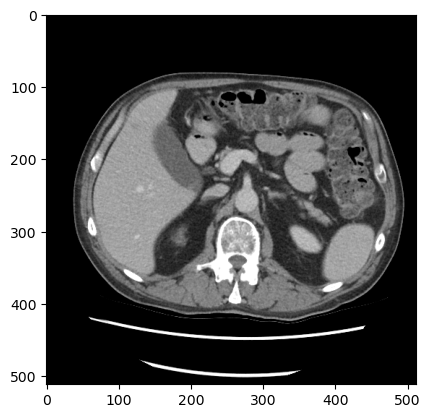

In [136]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from monai.transforms import NormalizeIntensity
image_1 =  sitk.ReadImage('../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_101040_0000.nii.gz')
image_1_array = sitk.GetArrayFromImage(image_1)
trans = NormalizeIntensity()
image_1_norm = trans(image_1_array)
plt.imshow(image_1_norm[50,:,:],cmap='gray')





In [129]:
from collections import Counter
Counter(labels)

Counter({1: 7, 2: 7, 0: 6})

In [ ]:

labels = []
for i,(data,label) in enumerate(Sub_loader):
    labels.append(label)



In [68]:
labels

[tensor([2])]

In [37]:
from sklearn.model_selection import StratifiedKFold

stk = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
for train_index, val_index in stk.split([i for i in range(10)]):
    pass

TypeError: split() missing 1 required positional argument: 'y'